# Single-Point simulation at Bondville site

In the last tutorial note, we have gone through downloading and compiling the code. 

Now we can move in to running a single-point simulation with provided data from Bondville site in Illinois.

A written documentation for running the single-point case is also provided under `./hrldas/hrldas/docs/README.single_point`: 
https://github.com/NCAR/hrldas/blob/master/hrldas/docs/README.single_point

## 1. Single-point forcing directory

`ls ./hrldas/hrldas/HRLDAS_forcing/run/examples/`

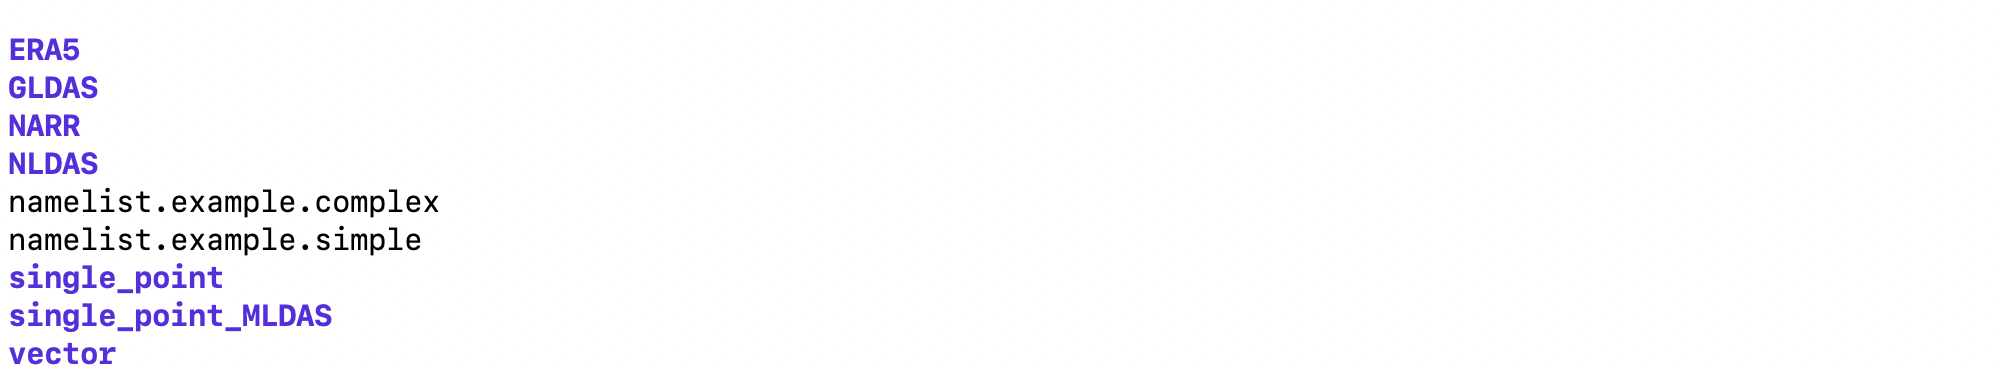

We will go into the **single_point** directory, as this directory contains one year forcing from the Bondville site in 1998.

`cd ./hrldas/hrldas/HRLDAS_forcing/run/examples/single_point`

`ls *`

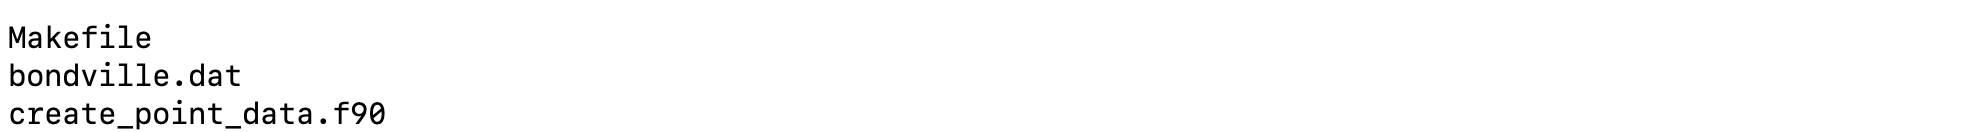


Three files are included in this directory: 

**Makefile** is the procedure used for making create_point_data executable, 

**bondville.dat** is the file containing single point data, and 

**create_point_data.f90** is the fortran code for creating forcing. 

Let's take a look at the **bondville.dat** format. 

## 2. Single-point data format
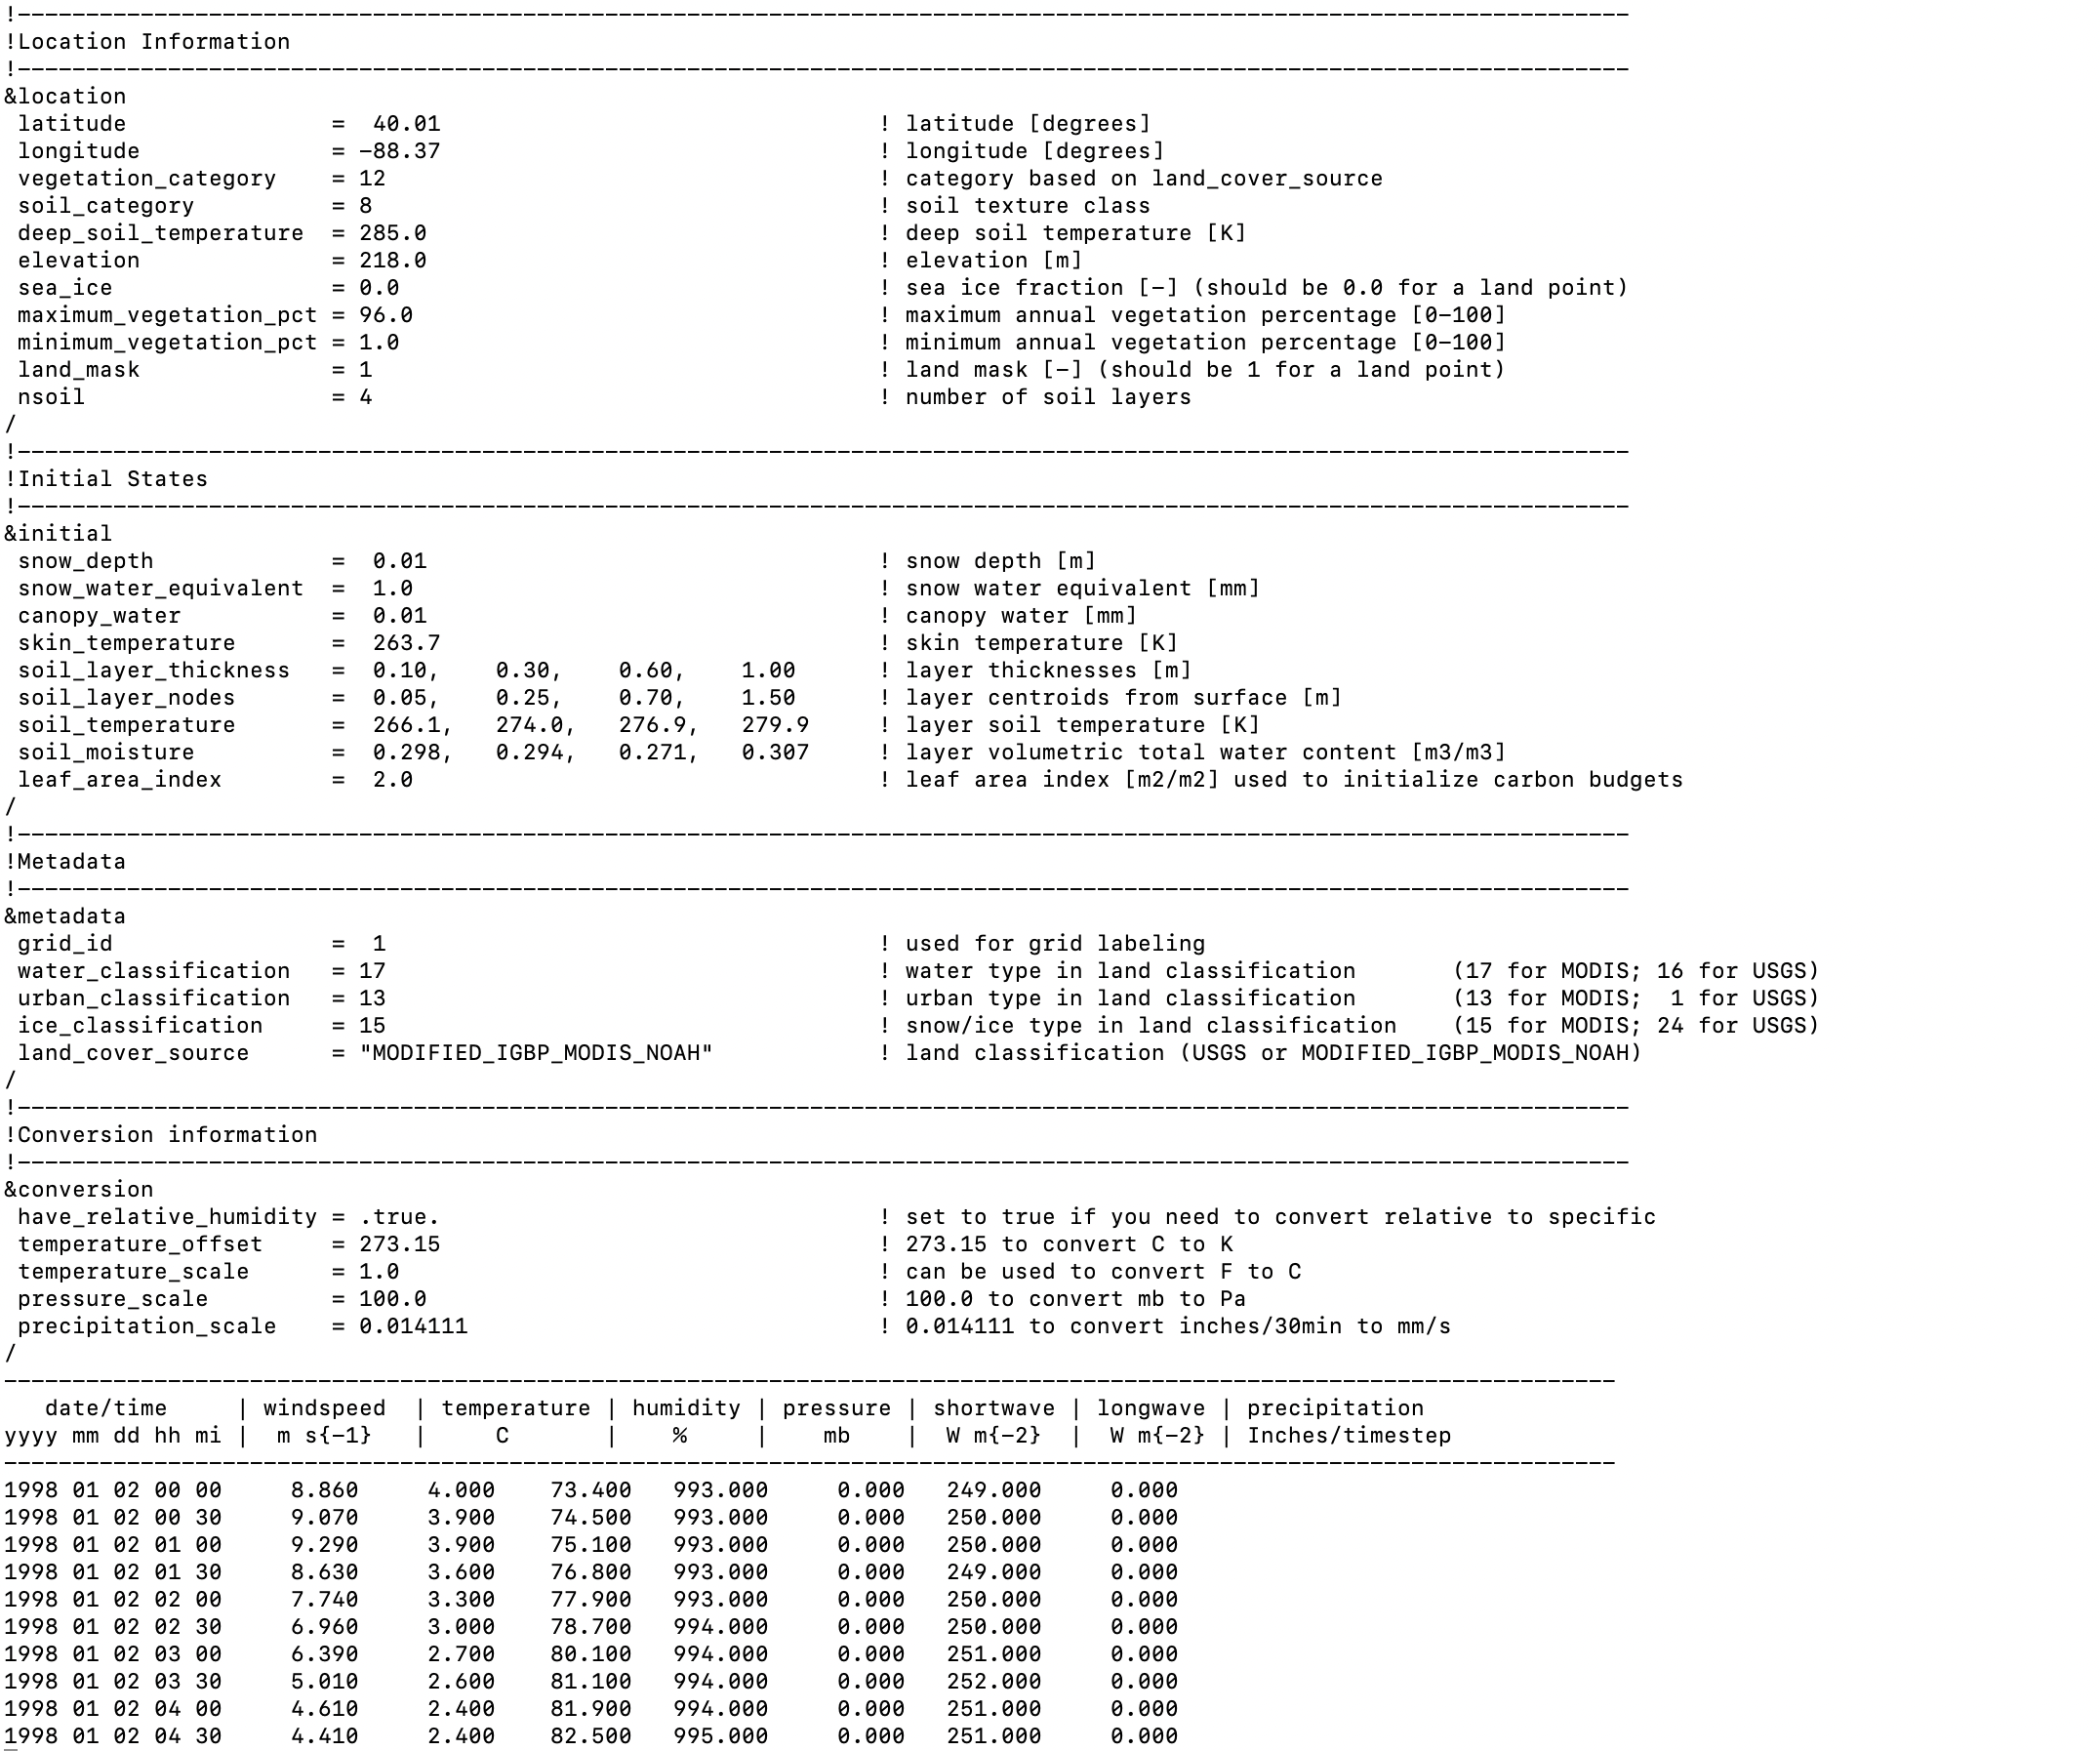
......

Here we can see four sections in the **bondville.dat** file:

**Location Information :** contains the lat/lon, landuse type, soil type, elevation information, etc.

**Initial States :** is about the initial conditions in this single-point, including soil moisture, soil temperature, snow water equivalent, skin temperature, LAI, etc.

**Metadata :** contains the landuse classification information, either "USGS" or "MODIS"

**Conversion information :** is used for converting units from observations to the required units model needs, which are shown in the data section. 

In the example, the single-point data is from 1998-01-02 to 1999-01-01 at the Bondville site in Illinois, including 7 variables: windspeed, temperature, humidity, pressure, shortwave and longwave radiation, and precipitation. 

**Note**: the model will require observational data from single-point site at **UTC** time. If you have your single-point data in local time, you will need to convert it to **UTC**, before running the **create_point_data.exe**.

Getting to understand the data format in this file will allow users to easily change data from other places around the world. 

## 3. Create single-point forcing

Now we can start to create single-point forcing. 

**make** command will compile the **create_point_data.exe** executable.

Then run **./create_point_data.exe**
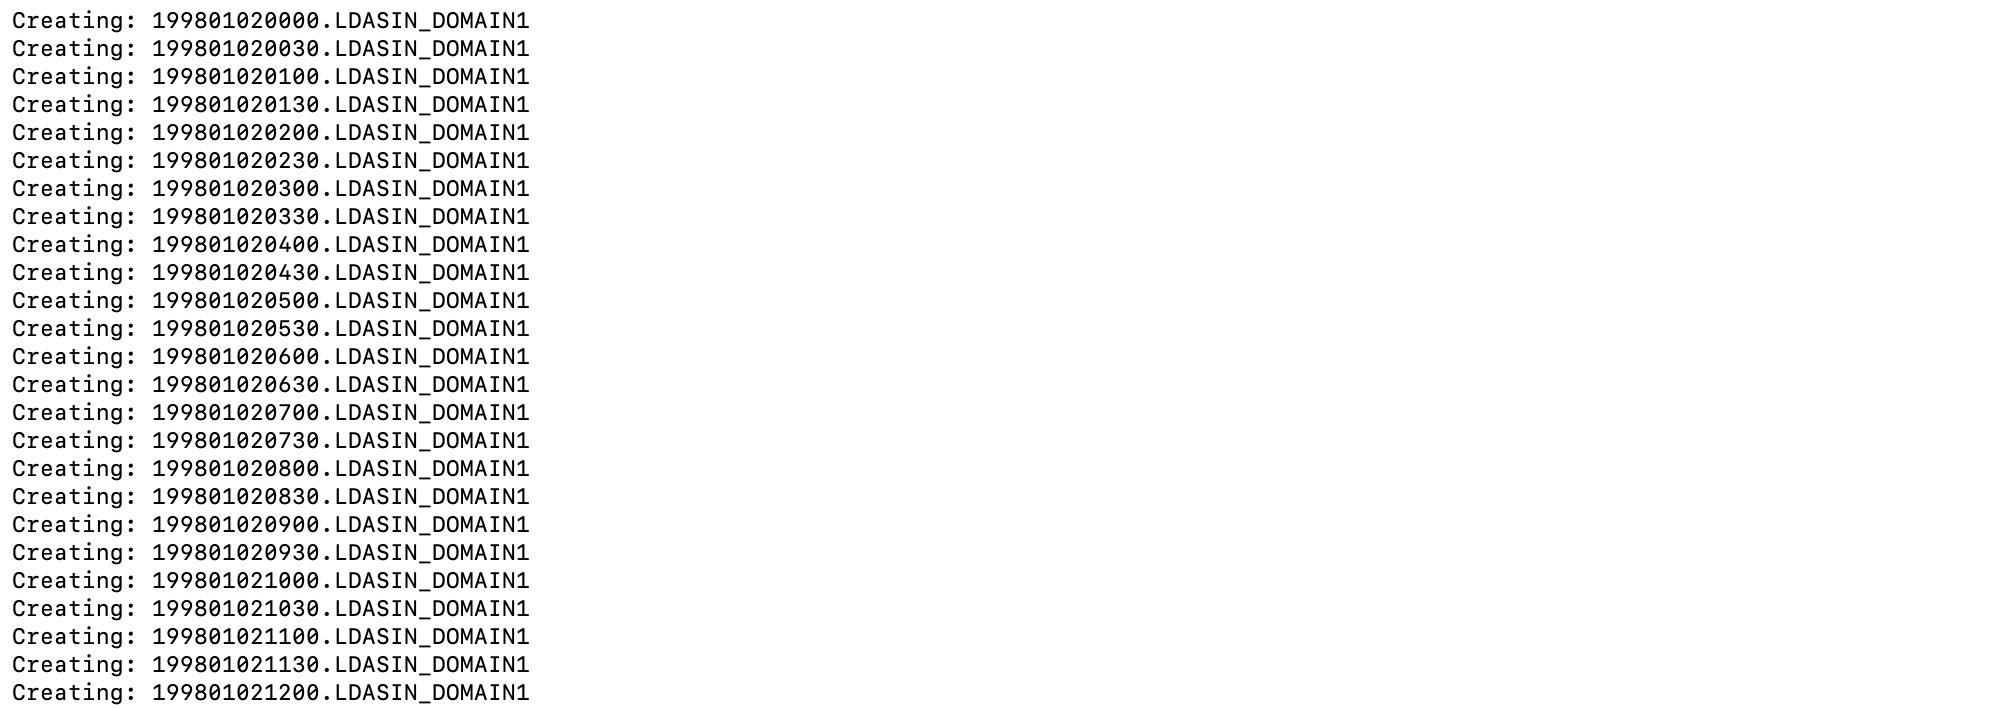
......


By the end of the program, we will have 30-min forcing data for Bondville site in 1998.

## 4. Edit namelist and run model

Now that we already have the 30-min forcing data, we can go to the **run** directory and edit **namelist** and start the model run.

`ls run`

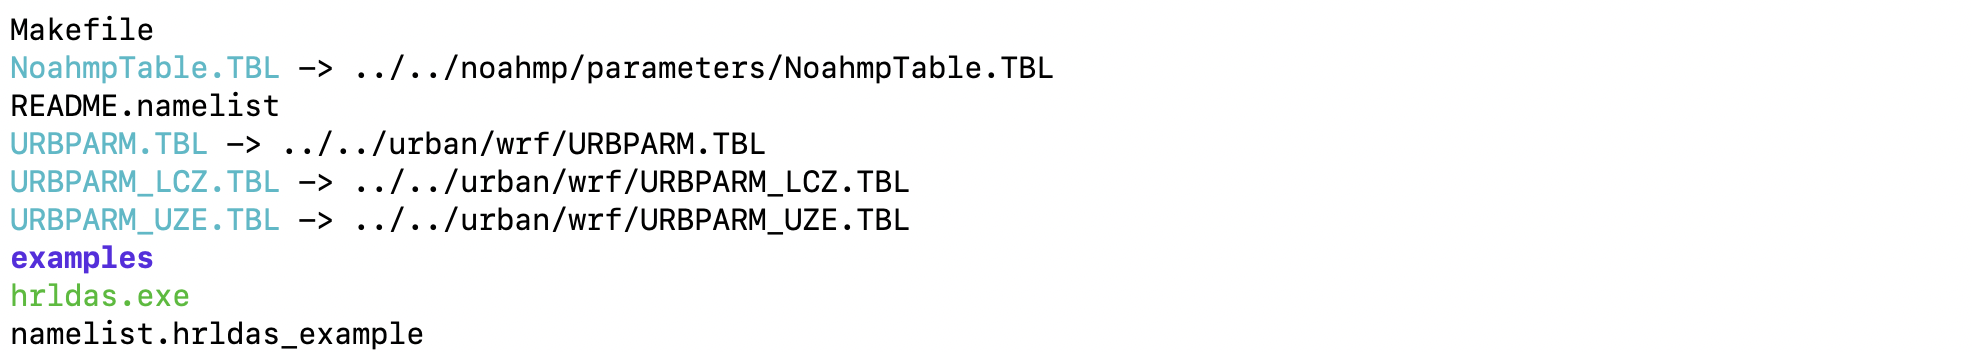


We can copy a namelist from one of the example directory and start editing:

`cp examples/single_point/namelist.hrldas.single_point namelist.hrldas`


(1) **Edit the path** of single-point forcing we have just created and output:

`HRLDAS_SETUP_FILE = "../HRLDAS_forcing/run/examples/single_point/hrldas_setup_single_point.nc"
 INDIR = "../HRLDAS_forcing/run/examples/single_point/"
 OUTDIR = "./"`


(2) **Simulation start time and run time** Uncomment the restart line, if it is a restart run. SPINUP_LOOPS is used for repeatedly running the same period, for a fast spinup option.

`START_YEAR  = 1998
 START_MONTH = 01
 START_DAY   = 02
 START_HOUR  = 00
 START_MIN   = 00`

(3) **Forcing variable names** (usually conventional variable names, no need to change)

`FORCING_NAME_T = "T2D"
 FORCING_NAME_Q = "Q2D"
 FORCING_NAME_U = "U2D"
 FORCING_NAME_V = "V2D"
 FORCING_NAME_P = "PSFC"
 FORCING_NAME_LW = "LWDOWN"
 FORCING_NAME_SW = "SWDOWN"
 FORCING_NAME_PR = "RAINRATE"`

(4) **Model physcis options** (Modify this part for your application). Let's say change **CROP_OPTION = 1** for turning on the crop model:

`DYNAMIC_VEG_OPTION                = 4
 CANOPY_STOMATAL_RESISTANCE_OPTION = 1
 BTR_OPTION                        = 1
 SURFACE_RUNOFF_OPTION             = 3
 SUBSURFACE_RUNOFF_OPTION          = 3
 DVIC_INFILTRATION_OPTION          = 1
 SURFACE_DRAG_OPTION               = 1
 FROZEN_SOIL_OPTION                = 1
 SUPERCOOLED_WATER_OPTION          = 1
 RADIATIVE_TRANSFER_OPTION         = 3
 SNOW_ALBEDO_OPTION                = 2
 PCP_PARTITION_OPTION              = 1
 SNOW_THERMAL_CONDUCTIVITY         = 1
 TBOT_OPTION                       = 2
 TEMP_TIME_SCHEME_OPTION           = 1
 GLACIER_OPTION                    = 1
 SURFACE_RESISTANCE_OPTION         = 1
 SOIL_DATA_OPTION                  = 1
 PEDOTRANSFER_OPTION               = 1
 CROP_OPTION                       = 1
 IRRIGATION_OPTION                 = 0
 IRRIGATION_METHOD                 = 0
 TILE_DRAINAGE_OPTION              = 0
 `

(5) **Timestep** for forcing and output. **FORCING_TIMESTEP** , **NOAH_TIMESTEP**, **OUTPUT_TIMESTEP** are in second. **SPLIT_OUTPUT_COUNT** put n output timestep together into one output file. **RESTART_FREQUENCY_HOURS** is in hour. 

`FORCING_TIMESTEP = 1800
 NOAH_TIMESTEP    = 1800
 OUTPUT_TIMESTEP  = 1800
 SPLIT_OUTPUT_COUNT = 99999
 SKIP_FIRST_OUTPUT = .false.
 RESTART_FREQUENCY_HOURS = 8760`

For this example, I make this number very large, so all 30-min output would be stored in one single output file.

If you put `SPLIT_OUTPUT_COUNT = 48`, then you will have daily output containting 48 30-min timesteps. 

(6) **Executing the model** 
For single-point, one-year simulation takes only about one minute at the login node:

`./hrldas.exe` (for 2D domain or longer simulation, we can submit job to cheyenne)

Now you would see the model successfully running on the login nodes and the runtime log are printed on the screen:
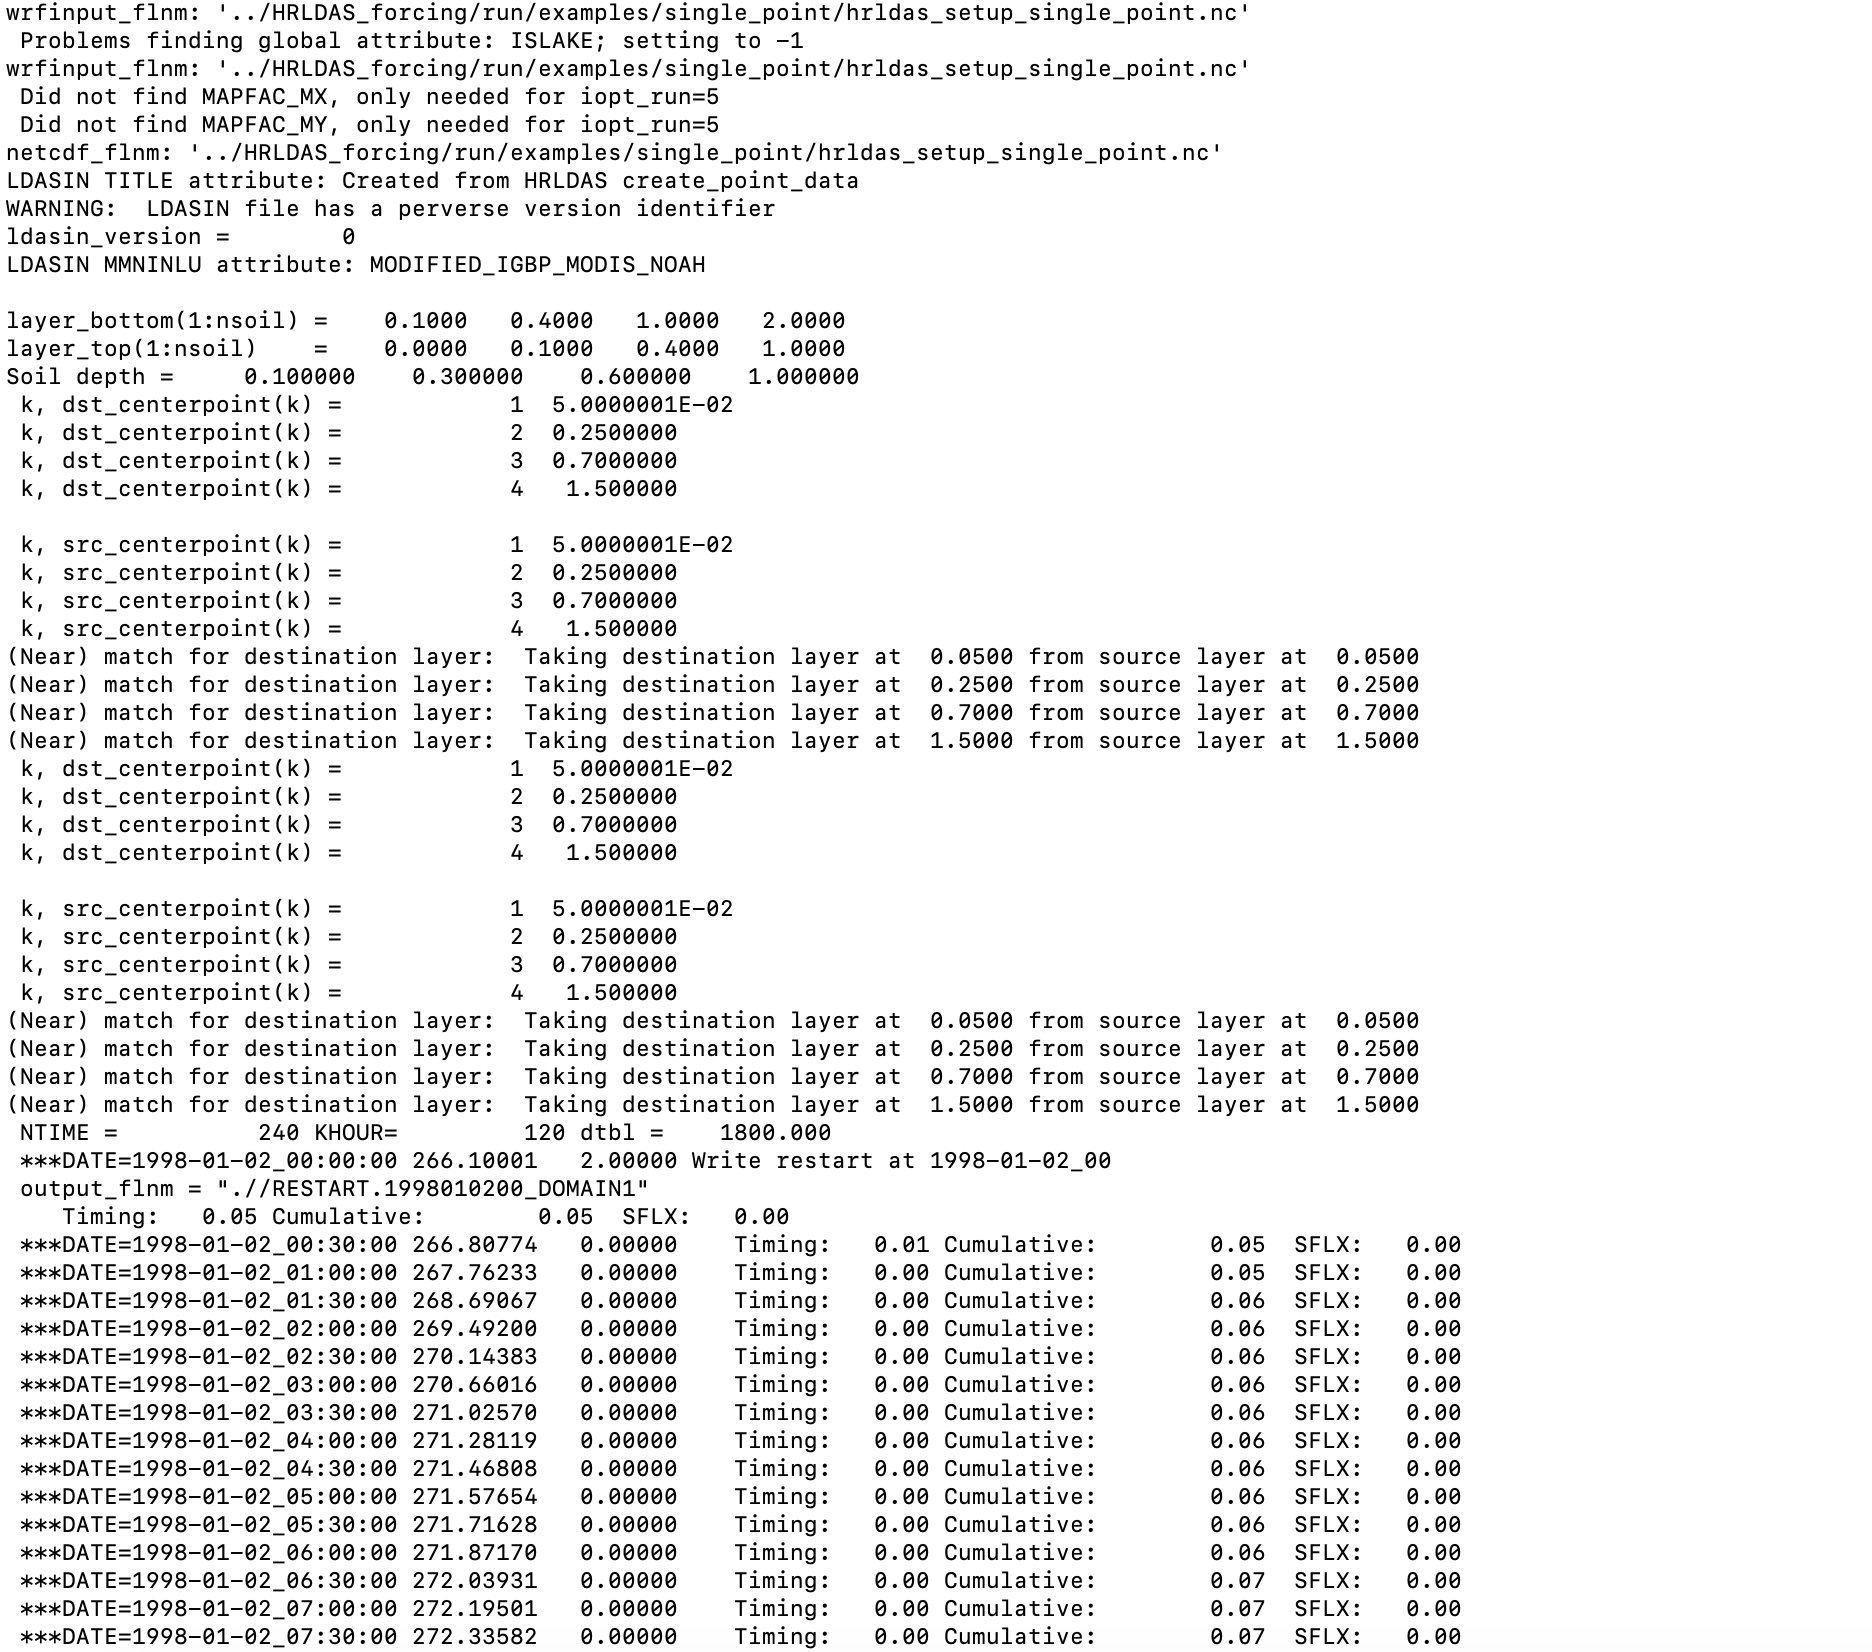
...

(7) **Check model results** 
If you have setup daily output every 48 30-min timestep, you can quickly check on daily model results is use **ncview**:

`ncview 199806200030.LDASOUT_DOMAIN1`

For example, on `LH` output:
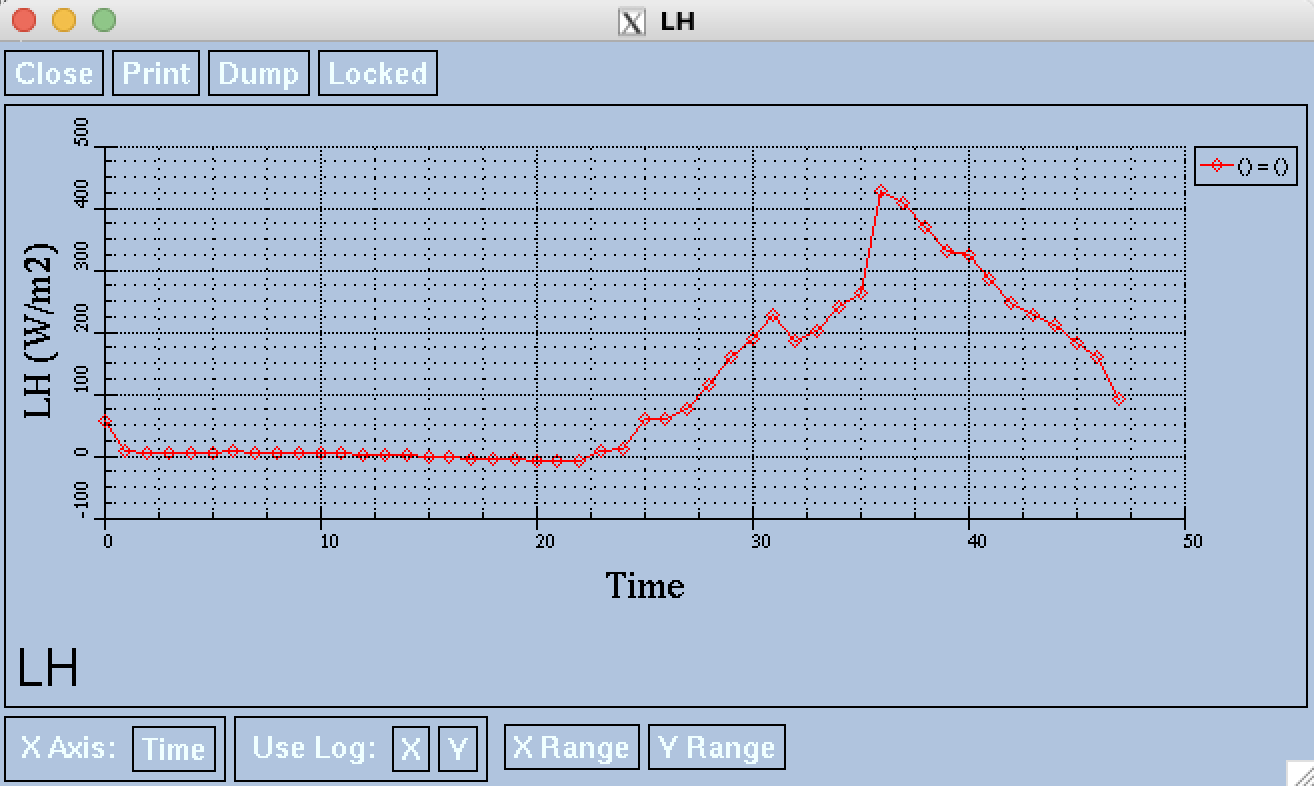

### Congratulations! You have successfully conducted the single-point simulation. 